# Mnist classification with NNs
A first example of a simple Neural Network, applied to a well known dataset.

In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import utils
import numpy as np

Let us load the mnist dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print("pixel range is [{},{}]".format(np.min(x_train),np.max(x_train))) 

(60000, 28, 28)
pixel range is [0,255]


We normalize the input in the range [0,1]

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train,(60000,28*28))
x_test = np.reshape(x_test,(10000,28*28))

The output of the network will be a proability distribution over the different categories. Similarly, we generate a ground truth distribution, and the training objective will consist in minimizing their distance (categorical crossentropy). The ground truth distribution is the so called "categorical" distribution: if x has label l, the corresponding categorical distribution has probaility 1 for the category l, and 0 for all the others.

In [5]:
print(y_train[0])
y_train_cat = utils.to_categorical(y_train)
print(y_train_cat[0])
y_test_cat = utils.to_categorical(y_test)

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Our first Netwok just implements logistic regression

In [6]:
xin = Input(shape=(784))
res = Dense(10,activation='softmax')(xin)

mynet = Model(inputs=xin,outputs=res)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
mynet.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Now we need to compile the network.
In order to do it, we need to pass two mandatory arguments:


*   the **optimizer**, in charge of governing the details of the backpropagation algorithm
*   the **loss function**

Several predefined optimizers exist, and you should just choose your favourite one. A common choice is Adam, implementing an adaptive lerning rate, with momentum

Optionally, we can specify additional metrics, mostly meant for monitoring the training process.


In [8]:
mynet.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Finally, we fit the model over the trianing set. 

Fitting, just requires two arguments: training data e ground truth, that is x and y. Additionally we can specify epochs, batch_size, and many additional arguments.

In particular, passing validation data allow the training procedure to measure loss and metrics on the validation set at the end of each epoch.

In [9]:
mynet.fit(x_train,y_train_cat, shuffle=True, epochs=10, batch_size=32,validation_data=(x_test,y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.4685 - acc: 0.8777 - val_loss: 0.3114 - val_acc: 0.9146
Epoch 2/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.3042 - acc: 0.9146 - val_loss: 0.2830 - val_acc: 0.9206
Epoch 3/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2837 - acc: 0.9202 - val_loss: 0.2745 - val_acc: 0.9232
Epoch 4/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2736 - acc: 0.9235 - val_loss: 0.2705 - val_acc: 0.9260
Epoch 5/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2666 - acc: 0.9261 - val_loss: 0.2680 - val_acc: 0.9259
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2623 - acc: 0.9275 - val_loss: 0.2650 - val_acc: 0.9263
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.2584 - acc: 0.9283 - val_l

In [10]:
xin = Input(shape=(784))
x = Dense(128,activation='relu')(xin)
res = Dense(10,activation='softmax')(x)

mynet2 = Model(inputs=xin,outputs=res)

In [11]:
mynet2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
mynet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
mynet2.fit(x_train,y_train_cat, shuffle=True, epochs=2, batch_size=32,validation_data=(x_test,y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0790 - acc: 0.9762 - val_loss: 0.0871 - val_acc: 0.9736
Epoch 2/2
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0585 - acc: 0.9818 - val_loss: 0.0763 - val_acc: 0.9773


An amazing improvement. WOW!

In [43]:
xin = Input(shape=(784))
x1 = Dense(128, activation='sigmoid')(xin)
x2 = Dense(64, activation='sigmoid')(x1)
res = Dense(10, activation='softmax')(x2)
mynet3 = Model(inputs= xin, outputs=res)

In [44]:
mynet3.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [46]:
mynet3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = mynet3.fit(x_train,y_train_cat,shuffle=True,epochs=10, batch_size=32, validation_data=(x_test,y_test_cat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 254us/sample - loss: 0.4703 - acc: 0.8798 - val_loss: 0.2099 - val_acc: 0.9403
Epoch 2/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.1747 - acc: 0.9486 - val_loss: 0.1499 - val_acc: 0.9541
Epoch 3/10
60000/60000 [==============================] - 12s 208us/sample - loss: 0.1214 - acc: 0.9641 - val_loss: 0.1149 - val_acc: 0.9641
Epoch 4/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0895 - acc: 0.9732 - val_loss: 0.0973 - val_acc: 0.9696
Epoch 5/10
60000/60000 [==============================] - 13s 214us/sample - loss: 0.0700 - acc: 0.9793 - val_loss: 0.0801 - val_acc: 0.9749
Epoch 6/10
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0547 - acc: 0.9838 - val_loss: 0.0764 - val_acc: 0.9766
Epoch 7/10
60000/60000 [==============================] - 14s 236us/sample - loss: 0.0443 - acc: 0.9875 

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


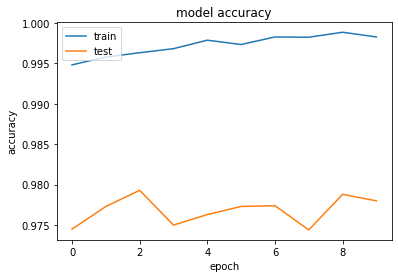

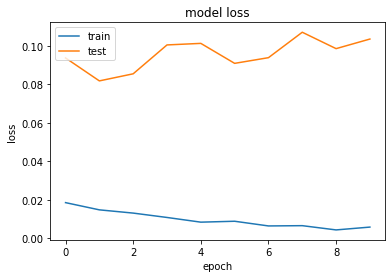

In [30]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()